# **TEXTURE BASED RETINAL BLOOD VESSEL SEGMENTATION**


**IMPORTING LIBRARIES**

In [12]:
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.morphology import disk  


**READING IMAGE**

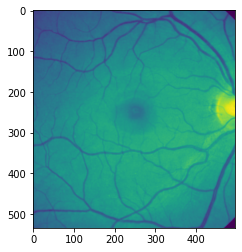

In [40]:
img = io.imread("/content/retina 1.png", as_gray=True)
plt.imshow(img)

**APPLYING MEDIAN FILTER**

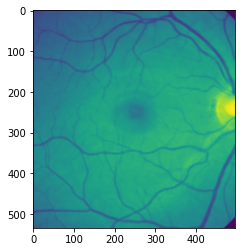

In [41]:
#MODIFICATON
#Median Filter to Reduce Noise

g_img =median(img, disk(3), mode='constant', cval=0.0)
plt.imshow(g_img)

**ENTROPY CALCULATION**

In [42]:
# CODE LINK: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/basicFunctions.html
#AUTHOR : Unknown

def entropy(signal):
        
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

**APPLYING ENTROPY TO IMAGE**

In [43]:
# CODE LINK: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/basicFunctions.html
#AUTHOR : Unknown

N=5
S=g_img.shape
E=np.array(g_img)
for row in range(S[0]):
        for col in range(S[1]):
                Lx=np.max([0,col-N])
                Ux=np.min([S[1],col+N])
                Ly=np.max([0,row-N])
                Uy=np.min([S[0],row+N])
                region=g_img[Ly:Uy,Lx:Ux].flatten()
                E[row,col]=entropy(region)

**PLOTTING HISTOGRAM AND CALCULATING THRESHOLD**

In [44]:
plt.hist(E.flat)
thresh = threshold_otsu(E)
print ("Threshold Value= ",thresh)

Threshold Value=  5.053144406010549


**GENERATING FINAL OUTPUT**

In [45]:
binary = E <= thresh
plt.imshow(binary)